# Import Libraries

In [ ]:
import pandas as pd # for dataframe creation
import numpy as np # for numerical calculations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import plotly.express as px #for visualizaiton
%matplotlib inline
from sklearn.cluster import KMeans #clustering algo

# Load Dataset



```
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
```



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv') #reading the csv file using pandas and storing in dataframe df

In [ ]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


# EDA

## Correlation analysis

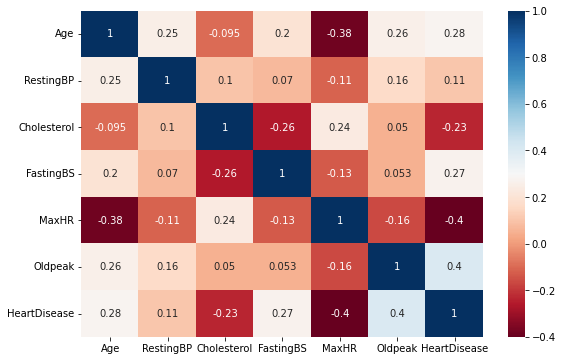

In [ ]:
plt.figure(figsize=(9,6))
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'RdBu')

## Countplots

In [ ]:

px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")

**Sex : male patients had a significantly higher rate of illness than women had**

In [ ]:
px.histogram(data_frame = df, x = 'MaxHR', color = 'HeartDisease', title="Distribution of Heart Diseases over Maximum Heart rate",barmode="group")

**"MaxHR" : about 75% of people with a maximum heart rate of 120 had a heart disease;**

In [ ]:
px.histogram(data_frame = df, x = 'FastingBS', color = 'HeartDisease', title="Distribution of Heart Diseases over Fasting Blood Sugar",barmode="group")

**"Fasting BS" : about 80% of people with a fasting blood sugar above 120 mg/dl had a heart disease**

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Heart Diseases over RestingECG')

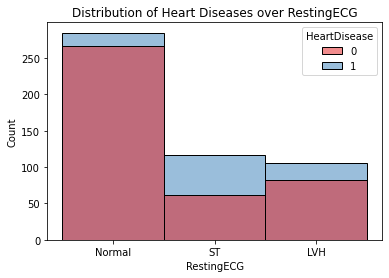

In [ ]:
sns.histplot(data = df ,x = 'RestingECG', hue = 'HeartDisease',palette = 'Set1')
plt.title("Distribution of Heart Diseases over RestingECG")

In [ ]:
px.histogram(df, x="ChestPainType", color="HeartDisease",title="Distribution of Heart Diseases over Chest Pain Type",barmode="group")

## Visualize Raw Dataset

Text(0.5, 1.0, 'Visualize Raw Dataset')

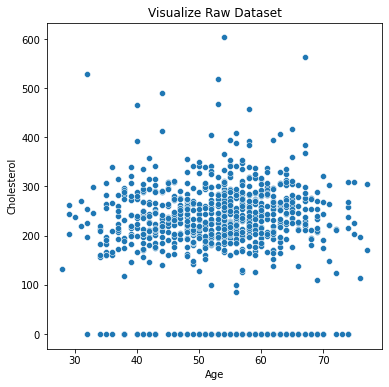

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x= df['Age'], y =df['Cholesterol'])
plt.title('Visualize Raw Dataset')

Text(0.5, 1.0, 'Visualize Raw Dataset')

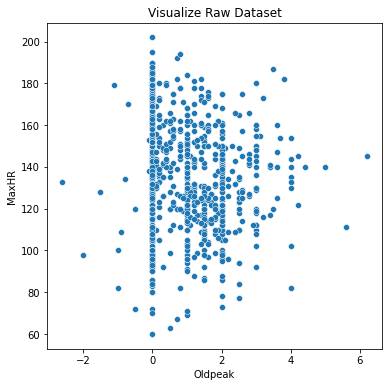

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x= df['Oldpeak'], y =df['MaxHR'])
plt.title('Visualize Raw Dataset')

Text(0.5, 1.0, 'Visualize Raw Dataset')

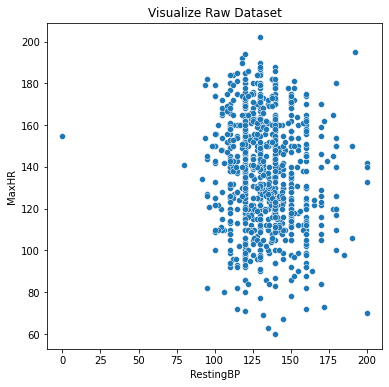

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x= df['RestingBP'], y =df['MaxHR'])
plt.title('Visualize Raw Dataset')

# Data Cleaning / Pre Processing

In [ ]:
df_copy = df.copy()

In [ ]:
#very important to drop the target if it is present
df_copy.drop(columns = ['HeartDisease'],inplace=True)
df_copy.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
target_ = df.iloc[:,-1]

In [ ]:
data = df_copy[['Age', 'Cholesterol']]
data2 = df_copy[['Oldpeak', 'MaxHR']]
data3 = df_copy[['Oldpeak', 'Age']]
data4 = df_copy[['Age', 'RestingBP']]
data5 = df_copy[['Cholesterol', 'MaxHR']]

# Elbow Method and Silhouette Plot

In [ ]:
dfin = df_copy[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


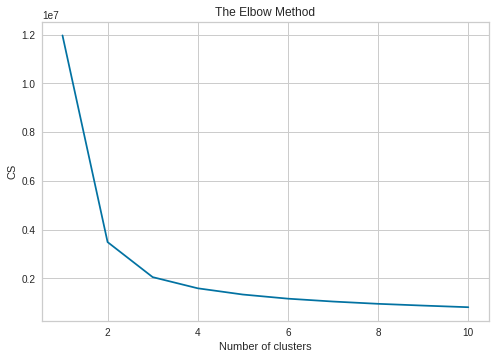

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(dfin)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

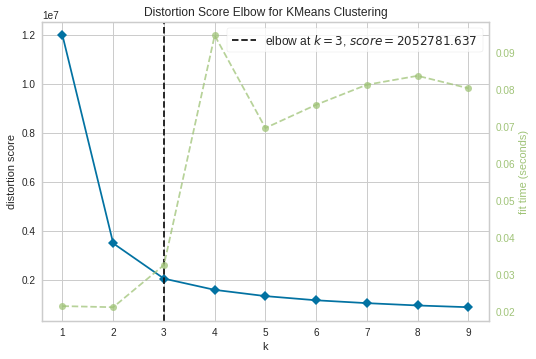

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(dfin)        # Fit the data to the visualizer
visualizer.show()

**We can see that at K=3 there is a sharp kink which indicates that K=3 is optimal number of clusters**

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

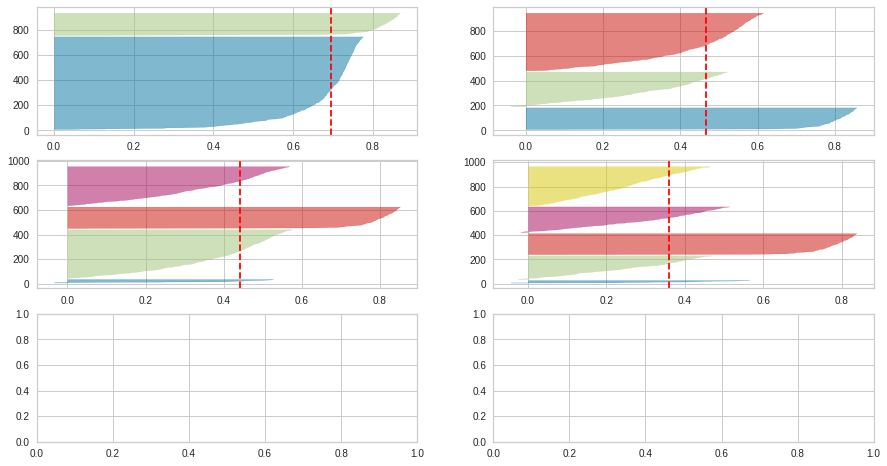

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dfin)


# 1. Age vs Chol KMEANS

## Standard Scaling

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

## Apply KMeans

In [ ]:

# Run local implementation of kmeans Here we tested 3 clusters
km = KMeans(n_clusters=2, init='random',
    n_init=10, max_iter=300)
km.fit(X_std)
centroids = km.cluster_centers_



In [ ]:
X_std

array([[-1.4331398 ,  0.82507026],
       [-0.47848359, -0.17196105],
       [-1.75135854,  0.7701878 ],
       ...,
       [ 0.37009972, -0.62016778],
       [ 0.37009972,  0.34027522],
       [-1.64528563, -0.21769643]])

In [ ]:

labels_ = km.predict(X_std)
labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

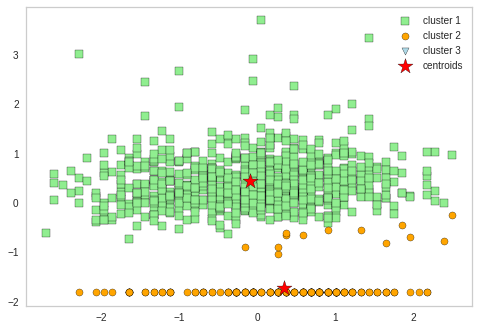

In [ ]:
# plot the 3 clusters
plt.scatter(
    X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Check quality of classification

In [ ]:


# check how many of the samples were correctly labeled
correct_labels = sum(target_ == labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_.size))

Result: 545 out of 918 samples were correctly labeled.


In [ ]:
#km.predict([[103,3044,	2,	88]])

In [ ]:
#print(labels)

## Plot the clustered data - Age vs Chol

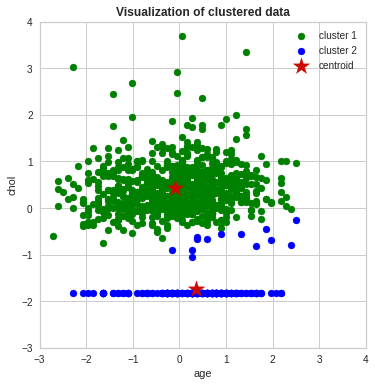

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='blue', label='cluster 2')
'''plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, km.labels_, metric='euclidean')

In [ ]:
score

0.4859445666428355

# 2. Oldpeak vs MaxHR KMEANS

## Standard Scaling

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data2)

## Apply KMeans

In [ ]:

# Run local implementation of kmeans Here we tested 2 clusters
km = KMeans(n_clusters=2, random_state = 42)
km.fit(X_std)
centroids = km.cluster_centers_



In [ ]:
X_std

array([[-0.83243239,  1.38292822],
       [ 0.10566353,  0.75415714],
       [-0.83243239, -1.52513802],
       ...,
       [ 0.29328271, -0.85706875],
       [-0.83243239,  1.4615246 ],
       [-0.83243239,  1.42222641]])

In [ ]:
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Check quality of classification

In [ ]:


# check how many of the samples were correctly labeled
correct_labels = sum(target_ == labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_.size))

Result: 243 out of 918 samples were correctly labeled.


In [ ]:
#print(labels)

## Plot the clustered data - Oldpeak vs MaxHR

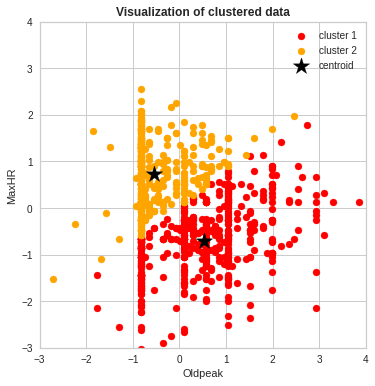

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='orange', label='cluster 2')
'''plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Oldpeak')
plt.ylabel('MaxHR')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, km.labels_, metric='euclidean')

In [ ]:
score

0.3876334129520072

# 3. Oldpeak vs Age KMEANS

## Standard Scaling

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data3)

## Apply KMeans

In [ ]:

# Run local implementation of kmeans Here we tested 2 clusters
km = KMeans(n_clusters=2, random_state = 42)
km.fit(X_std)
centroids = km.cluster_centers_



In [ ]:
X_std

array([[-0.83243239, -1.4331398 ],
       [ 0.10566353, -0.47848359],
       [-0.83243239, -1.75135854],
       ...,
       [ 0.29328271,  0.37009972],
       [-0.83243239,  0.37009972],
       [-0.83243239, -1.64528563]])

In [ ]:
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

## Check quality of classification

In [ ]:


# check how many of the samples were correctly labeled
correct_labels = sum(target_ == labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_.size))

Result: 631 out of 918 samples were correctly labeled.


In [ ]:
#print(labels)

## Plot the clustered data - Oldpeak vs Age

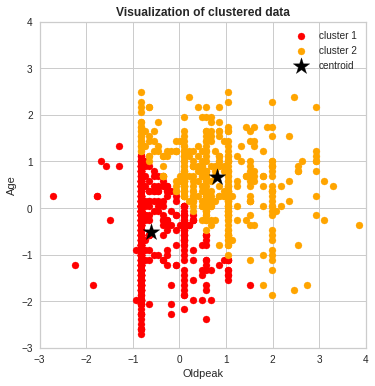

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='orange', label='cluster 2')
'''plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Oldpeak')
plt.ylabel('Age')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, km.labels_, metric='euclidean')

In [ ]:
score

0.38987915983291893

# 4. Age vs RestingBP KMEANS

## Standard Scaling

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data4)

## Apply KMeans

In [ ]:

# Run local implementation of kmeans Here we tested 2 clusters
km = KMeans(n_clusters=2, random_state = 42)
km.fit(X_std)
centroids = km.cluster_centers_



In [ ]:
X_std

array([[-1.4331398 ,  0.41090889],
       [-0.47848359,  1.49175234],
       [-1.75135854, -0.12951283],
       ...,
       [ 0.37009972, -0.12951283],
       [ 0.37009972, -0.12951283],
       [-1.64528563,  0.30282455]])

In [ ]:
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

## Check quality of classification

In [ ]:


# check how many of the samples were correctly labeled
correct_labels = sum(target_ == labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_.size))

Result: 567 out of 918 samples were correctly labeled.


In [ ]:
#print(labels)

## Plot the clustered data -  Age vs RestingBP

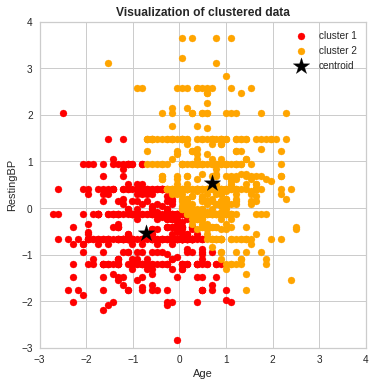

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='orange', label='cluster 2')
'''plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, km.labels_, metric='euclidean')

In [ ]:
score

0.3552938547706182

# 5. Cholesterol vs MaxHR KMEANS

## Standard Scaling

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data5)

## Apply KMeans

In [ ]:

# Run local implementation of kmeans Here we tested 2 clusters
km = KMeans(n_clusters=2, random_state = 42)
km.fit(X_std)
centroids = km.cluster_centers_



In [ ]:
X_std

array([[ 0.82507026,  1.38292822],
       [-0.17196105,  0.75415714],
       [ 0.7701878 , -1.52513802],
       ...,
       [-0.62016778, -0.85706875],
       [ 0.34027522,  1.4615246 ],
       [-0.21769643,  1.42222641]])

In [ ]:
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## Check quality of classification

In [ ]:


# check how many of the samples were correctly labeled
correct_labels = sum(target_ == labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_.size))

Result: 550 out of 918 samples were correctly labeled.


In [ ]:
#print(labels)

## Plot the clustered data - Cholesterol vs MaxHR

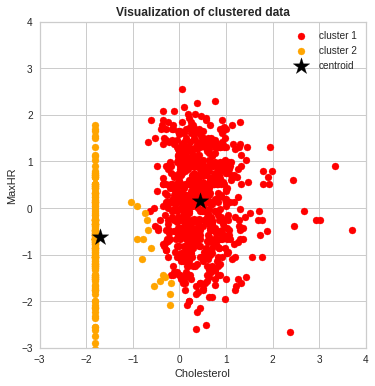

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='orange', label='cluster 2')
'''plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Cholesterol')
plt.ylabel('MaxHR')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, km.labels_, metric='euclidean')

In [ ]:
score

0.49722469482005677

# 3D testing

## Standard Scaling

In [ ]:
d1 = df_copy[['Cholesterol','MaxHR', 'Oldpeak']]
# Standardize the data
from sklearn.preprocessing import StandardScaler
d = StandardScaler().fit_transform(d1)

In [ ]:

import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(d)
y_kmeans = kmeans.predict(d)

## 3D plot
Scene = dict(xaxis = dict(title  = 'Cholesterol -->'),yaxis = dict(title  = 'MaxHR--->'),zaxis = dict(title  = 'Oldpeak-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=d[:, 0], y=d[:, 1], z=d[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Standard Scaling

In [ ]:
d2 = df_copy[['Age','MaxHR', 'Oldpeak']]
# Standardize the data
from sklearn.preprocessing import StandardScaler
d = StandardScaler().fit_transform(d2)

In [ ]:

import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(d)
y_kmeans = kmeans.predict(d)

## 3D plot
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'MaxHR--->'),zaxis = dict(title  = 'Oldpeak-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=d[:, 0], y=d[:, 1], z=d[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()